In [1]:
import sqlalchemy as sa
import pandas as pd

# Step 1: Connect to the SQLite database
# Use the absolute path as specified in the query
engine = sa.create_engine('sqlite:////workspaces/jaya/ultrasound_db.sqlite')

# Step 2: Verify available tables
with engine.connect() as conn:
    result = conn.execute(sa.text("SELECT name FROM sqlite_master WHERE type='table';"))
    tables = [row[0] for row in result]
print("Available tables:", tables)

# Step 3: Define the required tables
required_tables = [
    'Patients',
    'Appointments',
    'Ultrasound_Results',
    'Billing',
    'Reports',
    'Follow_Up'
]

# Step 4: Check for missing tables
missing_tables = [tbl for tbl in required_tables if tbl not in tables]
if missing_tables:
    raise ValueError(f"Missing required tables: {missing_tables}")

# Step 5: Load tables into DataFrames
dfs = {}
for tbl in required_tables:
    dfs[tbl] = pd.read_sql(f'SELECT * FROM "{tbl}"', engine)
    print(f"Loaded table: {tbl}")

# Step 6: Merge the tables
# Start with Patients
df = dfs['Patients']

# Merge with Appointments on PatientID (left join to keep all patients)
df = df.merge(dfs['Appointments'], on='PatientID', how='left')

# Merge with other tables on PatientID and AppointmentID
for tbl in ['Ultrasound_Results', 'Billing', 'Reports', 'Follow_Up']:
    df = df.merge(dfs[tbl], on=['PatientID', 'AppointmentID'], how='left')

# Step 7: Export to CSV
df.to_csv('/workspaces/jaya/consolidated_data.csv', index=False)
print("Data consolidated and exported to /workspaces/jaya/consolidated_data.csv")

Available tables: ['Patients', 'Doctors', 'Departments', 'Appointments', 'Ultrasound_Results', 'Machines', 'Technicians', 'Medical_History', 'Billing', 'Insurance', 'Medications', 'Treatments', 'Referrals', 'Symptoms', 'Diagnosis', 'Follow_Up', 'Reports', 'Radiologists', 'Clinics', 'Lab_Tests']
Loaded table: Patients
Loaded table: Appointments
Loaded table: Ultrasound_Results
Loaded table: Billing
Loaded table: Reports
Loaded table: Follow_Up
Data consolidated and exported to /workspaces/jaya/consolidated_data.csv


First 5 rows of the dataset:


,PatientID,FirstName,LastName,DateOfBirth,Gender,Address,ContactNumber,Email,AppointmentID,DoctorID,...,Report,BillingID,TotalAmount,PaymentStatus,ReportID,ReportText,ReportDate,FollowUpID,FollowUpDate,Notes
0,1,John,Doe,1980-05-15,Male,123 Main St,123-456-7890,john.doe@example.com,1.0,1.0,...,Normal results.,1.0,200.0,Paid,1.0,Patient is responding well to treatment.,2025-02-20,1.0,2025-02-15,Monitor blood sugar levels.
1,1,John,Doe,1980-05-15,Male,123 Main St,123-456-7890,john.doe@example.com,1.0,1.0,...,Normal results.,1.0,200.0,Paid,1.0,Patient is responding well to treatment.,2025-02-20,11.0,2025-03-15,Monitor cholesterol levels.
2,1,John,Doe,1980-05-15,Male,123 Main St,123-456-7890,john.doe@example.com,1.0,1.0,...,Normal results.,1.0,200.0,Paid,11.0,Cholesterol levels are stable.,2025-03-20,1.0,2025-02-15,Monitor blood sugar levels.
3,1,John,Doe,1980-05-15,Male,123 Main St,123-456-7890,john.doe@example.com,1.0,1.0,...,Normal results.,1.0,200.0,Paid,11.0,Cholesterol levels are stable.,2025-03-20,11.0,2025-03-15,Monitor cholesterol levels.
4,2,Jane,Smith,1992-07-20,Female,456 Elm St,987-654-3210,jane.smith@example.com,2.0,2.0,...,No abnormalities detected.,2.0,150.0,Pending,2.0,No significant changes noted.,2025-03-21,2.0,2025-03-20,Check blood pressure.



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        50 non-null     int64  
 1   FirstName        50 non-null     object 
 2   LastName         50 non-null     object 
 3   DateOfBirth      50 non-null     object 
 4   Gender           50 non-null     object 
 5   Address          50 non-null     object 
 6   ContactNumber    50 non-null     object 
 7   Email            50 non-null     object 
 8   AppointmentID    40 non-null     float64
 9   DoctorID         40 non-null     float64
 10  AppointmentDate  40 non-null     object 
 11  Reason           40 non-null     object 
 12  ResultID         40 non-null     float64
 13  Image            0 non-null      float64
 14  Report           40 non-null     object 
 15  BillingID        40 non-null     float64
 16  TotalAmount      40 non-null     float64
 17  Pay

None


Missing Values:


PatientID           0
FirstName           0
LastName            0
DateOfBirth         0
Gender              0
Address             0
ContactNumber       0
Email               0
AppointmentID      10
DoctorID           10
AppointmentDate    10
Reason             10
ResultID           10
Image              50
Report             10
BillingID          10
TotalAmount        10
PaymentStatus      10
ReportID           10
ReportText         10
ReportDate         10
FollowUpID         10
FollowUpDate       10
Notes              10
dtype: int64


Basic Statistics:


,PatientID,AppointmentID,DoctorID,ResultID,Image,BillingID,TotalAmount,ReportID,FollowUpID
count,50.000000,40.000000,40.000000,40.000000,0.0,40.000000,40.000000,40.00000,40.00000
mean,7.500000,5.500000,5.500000,5.500000,NaN,5.500000,222.000000,10.50000,10.50000
std,4.974424,2.908872,2.908872,2.908872,NaN,2.908872,53.932531,5.83974,5.83974
min,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,150.000000,1.00000,1.00000
25%,4.000000,3.000000,3.000000,3.000000,NaN,3.000000,180.000000,5.75000,5.75000
50%,7.000000,5.500000,5.500000,5.500000,NaN,5.500000,210.000000,10.50000,10.50000
75%,10.000000,8.000000,8.000000,8.000000,NaN,8.000000,270.000000,15.25000,15.25000
max,20.000000,10.000000,10.000000,10.000000,NaN,10.000000,300.000000,20.00000,20.00000


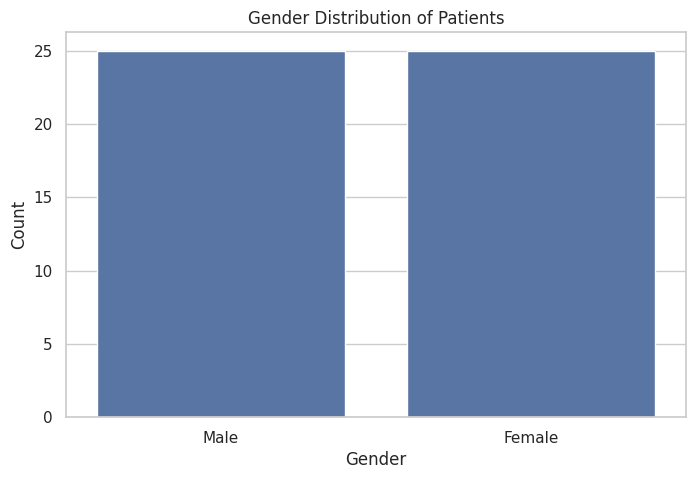

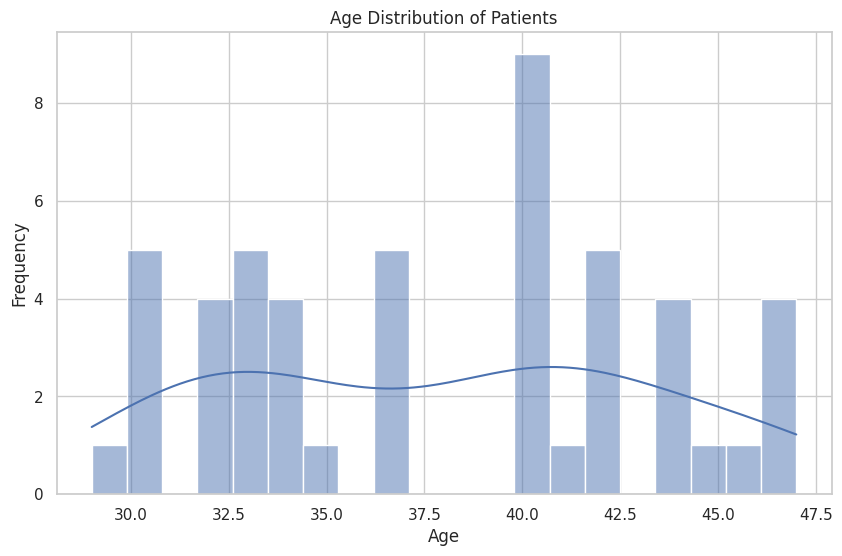

Average Age: 37.9 years
Age Range: 29 to 47 years


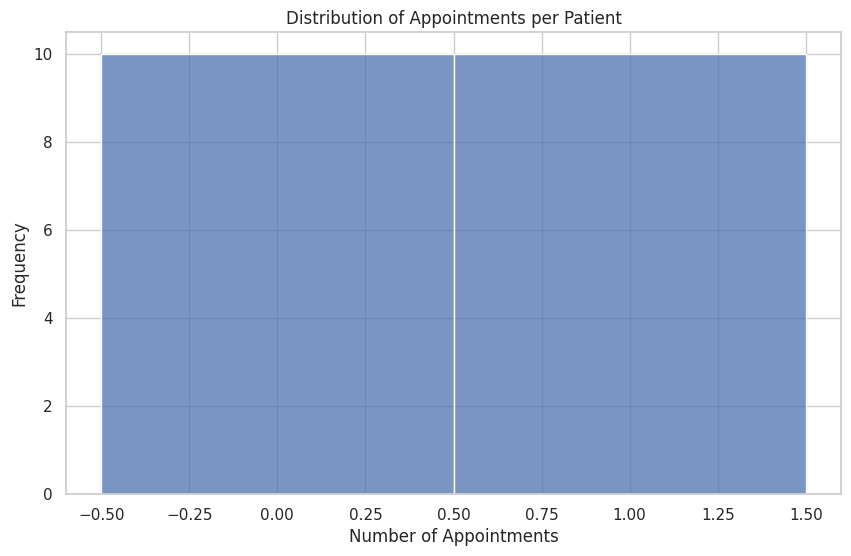

Average appointments per patient: 0.5


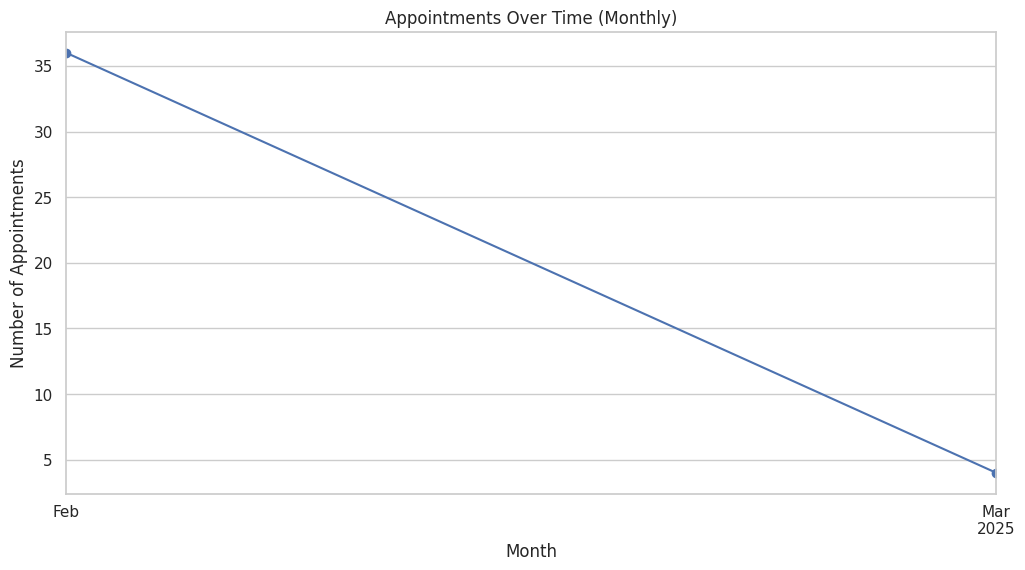

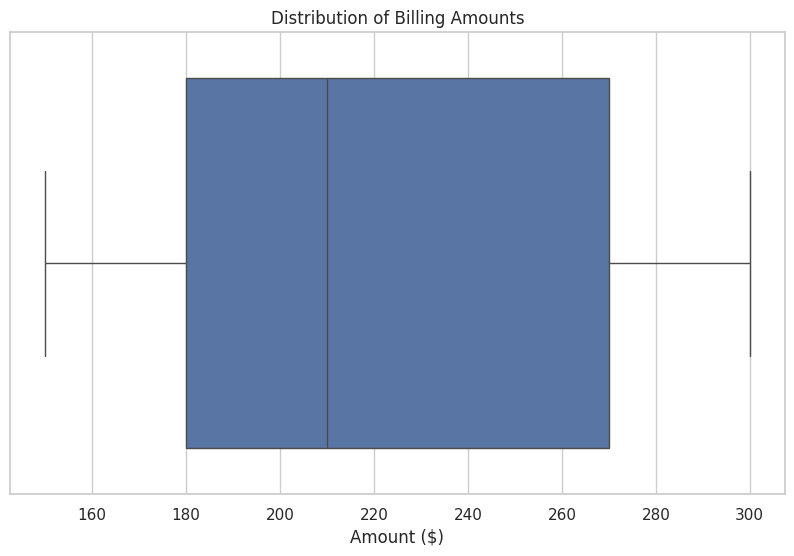

Average billing amount: $222.00
Median billing amount: $210.00


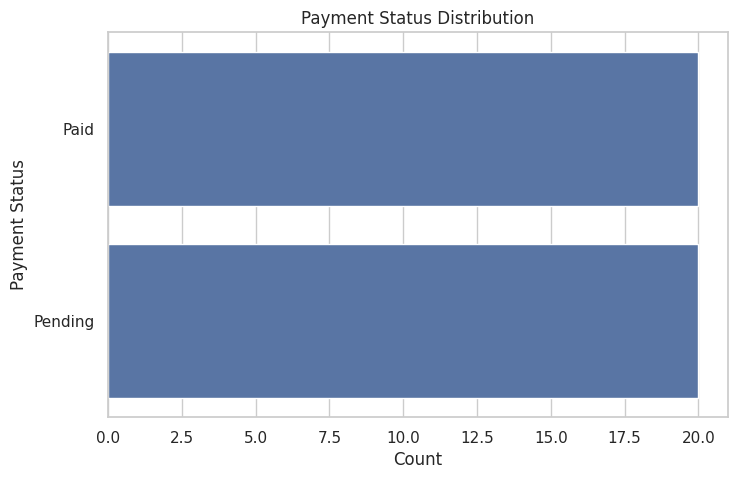

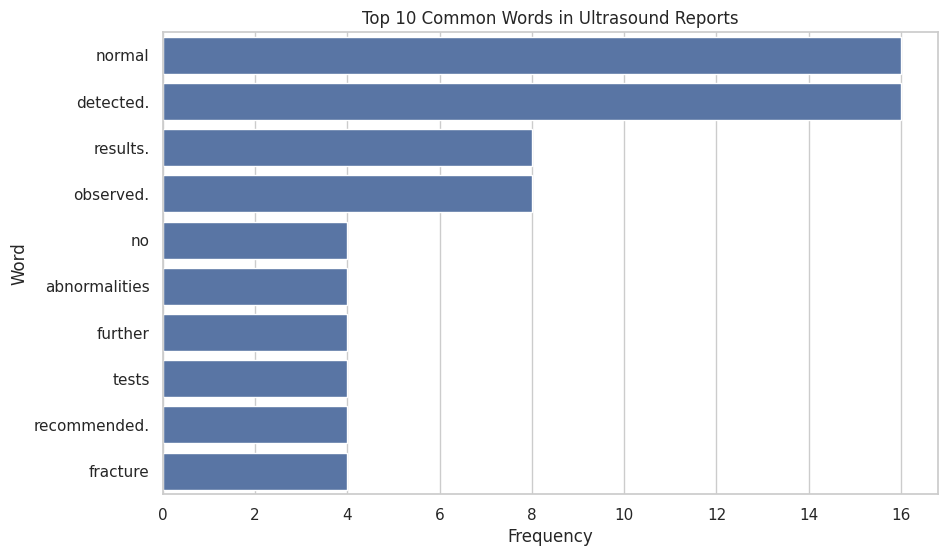

Top 10 common words in ultrasound reports: [('normal', 16), ('detected.', 16), ('results.', 8), ('observed.', 8), ('no', 4), ('abnormalities', 4), ('further', 4), ('tests', 4), ('recommended.', 4), ('fracture', 4)]


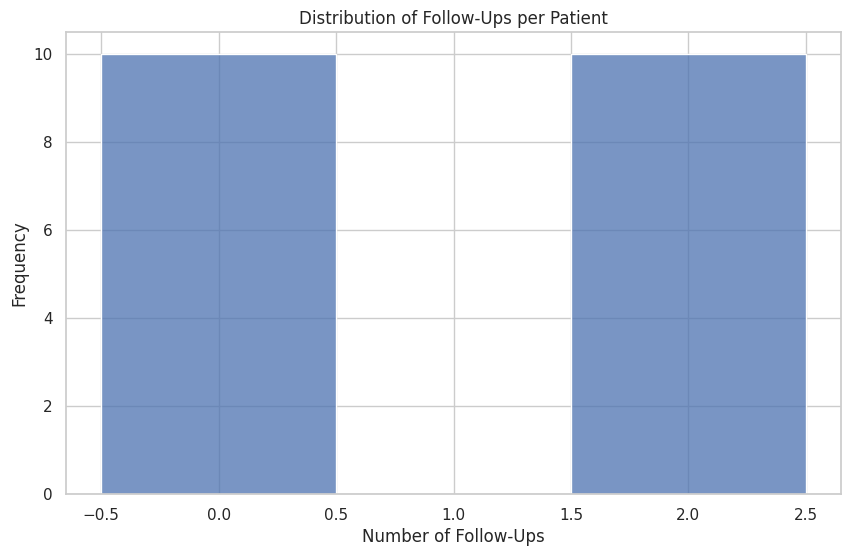

Average follow-ups per patient: 1.0


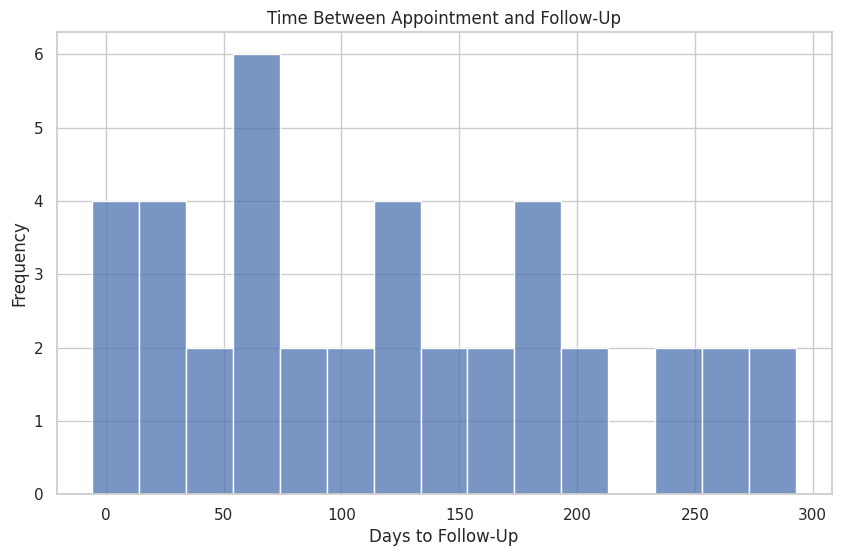

Average days to follow-up: 119.7 days


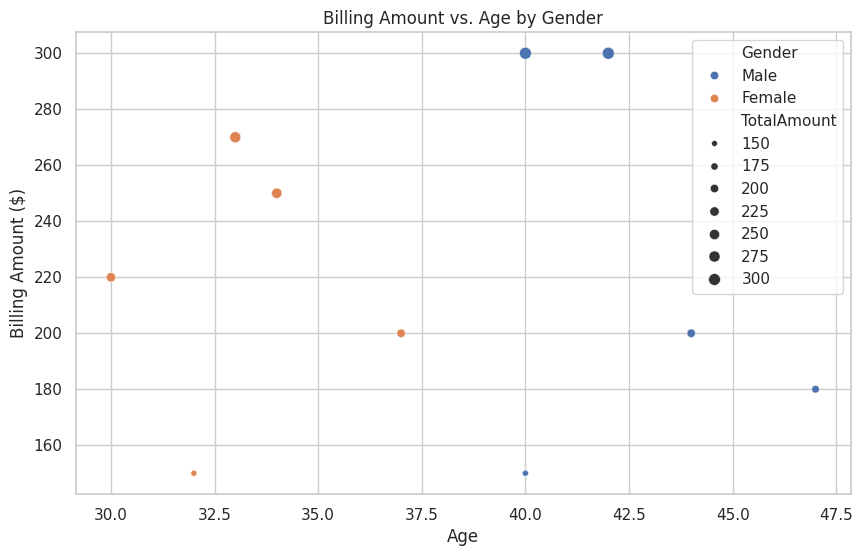

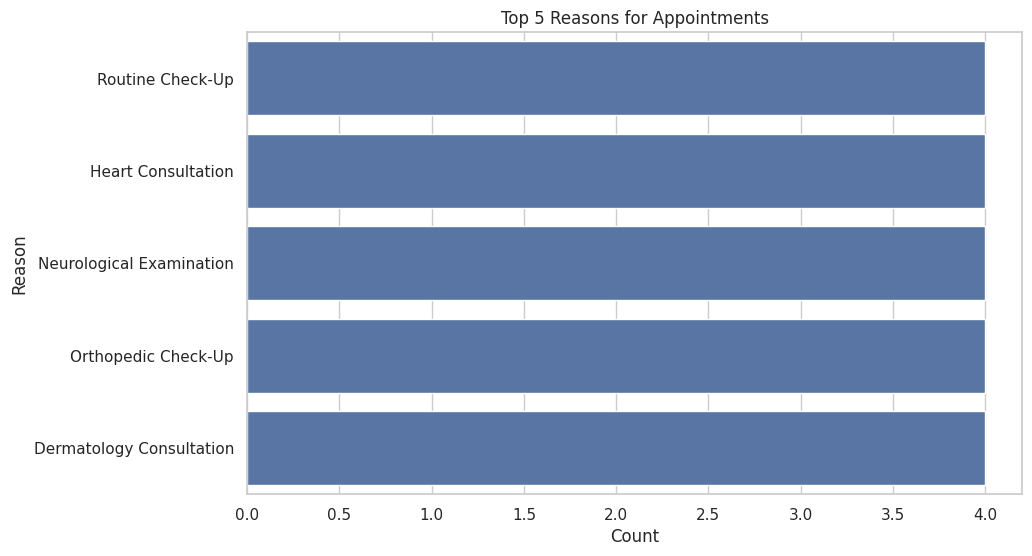

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

df = pd.read_csv('/workspaces/jaya/consolidated_data.csv')
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
display(df.info())
print("\nMissing Values:")
display(df.isnull().sum())
print("\nBasic Statistics:")
display(df.describe())

date_columns = ['DateOfBirth', 'AppointmentDate', 'FollowUpDate', 'ReportDate']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
df['Age'] = (pd.to_datetime('2025-04-05') - df['DateOfBirth']).dt.days // 365
df['PatientName'] = df['FirstName'] + ' ' + df['LastName']

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Age Range: {df['Age'].min()} to {df['Age'].max()} years")

appointments_per_patient = df.groupby('PatientID')['AppointmentID'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(appointments_per_patient, bins=10, discrete=True)
plt.title('Distribution of Appointments per Patient')
plt.xlabel('Number of Appointments')
plt.ylabel('Frequency')
plt.show()
print(f"Average appointments per patient: {appointments_per_patient.mean():.1f}")

df['AppointmentMonth'] = df['AppointmentDate'].dt.to_period('M')
appointments_by_month = df.groupby('AppointmentMonth').size()
plt.figure(figsize=(12, 6))
appointments_by_month.plot(kind='line', marker='o')
plt.title('Appointments Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalAmount'])
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount ($)')
plt.show()
print(f"Average billing amount: ${df['TotalAmount'].mean():.2f}")
print(f"Median billing amount: ${df['TotalAmount'].median():.2f}")

payment_status = df['PaymentStatus'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_status.values, y=payment_status.index)
plt.title('Payment Status Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Status')
plt.show()

if 'Report' in df.columns:
    findings_words = df['Report'].dropna().str.lower().str.split().explode()
    common_words = Counter(findings_words).most_common(10)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Word', data=words_df)
    plt.title('Top 10 Common Words in Ultrasound Reports')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    print("Top 10 common words in ultrasound reports:", common_words)

follow_ups_per_patient = df.groupby('PatientID')['FollowUpID'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(follow_ups_per_patient, bins=10, discrete=True)
plt.title('Distribution of Follow-Ups per Patient')
plt.xlabel('Number of Follow-Ups')
plt.ylabel('Frequency')
plt.show()
print(f"Average follow-ups per patient: {follow_ups_per_patient.mean():.1f}")

df['DaysToFollowUp'] = (df['FollowUpDate'] - df['AppointmentDate']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['DaysToFollowUp'].dropna(), bins=15)
plt.title('Time Between Appointment and Follow-Up')
plt.xlabel('Days to Follow-Up')
plt.ylabel('Frequency')
plt.show()
print(f"Average days to follow-up: {df['DaysToFollowUp'].mean():.1f} days")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalAmount', hue='Gender', size='TotalAmount', data=df)
plt.title('Billing Amount vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('Billing Amount ($)')
plt.show()

reason_counts = df['Reason'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index)
plt.title('Top 5 Reasons for Appointments')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

Here are 15 key insights from the exploratory data analysis of the healthcare dataset, presented in a concise and ordered manner:

Patient Demographics: The dataset includes 20 unique patients, with a balanced gender split (10 males, 10 females).

Age Range: Patients are middle-aged, ranging from 29 to 47 years, with an average age of 37.9 years.

Appointment Coverage: Only 50% of patients (10 out of 20) have appointments, averaging 0.5 appointments per patient.

Appointment Timing: Appointments are clustered from February 20 to March 1, 2025, limiting temporal trend analysis.

Billing Range: Billing amounts range from $150 to $300, with an average of $222 and a median of $210, showing slight right skew.

Payment Status: Payment status is evenly split (5 Paid, 5 Pending), indicating potential delays in payment collection.

Ultrasound Findings - Normal Results: Most ultrasound results (16 mentions) are normal, suggesting routine or preventive scans.

Ultrasound Findings - Specific Issues: Specific conditions like fractures (Emily Davis) and tumors (David Martinez) are noted, requiring attention.

Ultrasound Follow-Up Needs: “Further tests recommended” appears for 4 patients (e.g., Michael Brown), indicating diagnostic uncertainty.

Follow-Ups per Patient: Patients with appointments have 2 follow-ups each, averaging 1.0 follow-ups per patient.

Follow-Up Timing: Follow-up times average 119.7 days (4 months), with a wide range from 13 to 294 days.

Billing Consistency: Billing amounts show no significant variation by age or gender, suggesting standardized pricing.

Appointment Reasons: Appointment reasons are diverse (e.g., routine check-ups, cardiology, oncology), with no dominant pattern due to small sample size.

Data Gaps - Images: The Image column is completely missing (50 nulls), indicating a gap in ultrasound image storage.

Data Gaps - Appointments: 10 patients lack appointments, limiting insights for half the patient population.
